In [1]:
import pandas as pd
import numpy as np

### Regression Analysis :

In [2]:
# Importing the data :
df =  pd.read_csv('C:/Users/Zahra/Downloads/cad_jpy.csv',index_col='Date',parse_dates=True,infer_datetime_format=True)

In [3]:
df.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [4]:
# trimming the data:
df = df.loc['1990-01-01':]
df.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


In [5]:
# calculating the daily returns :
returns_df = df.Price.pct_change()*100

In [6]:
returns_df = returns_df.dropna()

In [7]:
returns_df = returns_df.replace(-np.inf,np.nan)

In [8]:
df['Returns'] = returns_df

In [9]:
df.dropna(inplace=True)

In [10]:
df.head()

,Price,Open,High,Low,Returns
Date,,,,,
1990-01-03,125.30,125.24,125.30,125.24,-0.846720
1990-01-04,123.46,123.41,123.46,123.41,-1.468476
1990-01-05,124.54,124.48,124.54,124.48,0.874777
1990-01-08,124.27,124.21,124.27,124.21,-0.216798
1990-01-09,125.10,125.04,125.10,125.04,0.667901


In [11]:
# making a feature representing the lagged reeturns against returns.
df['Lagged_returns'] = df.Returns.shift()
df.head()

,Price,Open,High,Low,Returns,Lagged_returns
Date,,,,,,
1990-01-03,125.30,125.24,125.30,125.24,-0.846720,NaN
1990-01-04,123.46,123.41,123.46,123.41,-1.468476,-0.846720
1990-01-05,124.54,124.48,124.54,124.48,0.874777,-1.468476
1990-01-08,124.27,124.21,124.27,124.21,-0.216798,0.874777
1990-01-09,125.10,125.04,125.10,125.04,0.667901,-0.216798


In [12]:
df.dropna(inplace=True)

In [13]:
# splitting the time period into train and test:
train = df.loc[:'2017']
test = df.loc['2018':]

In [14]:
# spliting the train and test data into independent and dependent variables:
X_train=train.Lagged_returns.to_frame()
X_test=test.Lagged_returns.to_frame()
y_train=train.Returns
y_test=test.Returns
X_train.head()

,Lagged_returns
Date,
1990-01-04,-0.846720
1990-01-05,-1.468476
1990-01-08,0.874777
1990-01-09,-0.216798
1990-01-10,0.667901


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
# Assigning LinearRegression model to a variable
model = LinearRegression()

In [17]:
# fitting the model :
model.fit(X_train,y_train)

LinearRegression()

In [18]:
# based on what the model learned from the training model, utilizing that on the testing period:
prediction = model.predict(X_test)

In [19]:
# Making data frame containing the results of the mosel and the actual value of dependent variable for comparison:
result_comparison = pd.DataFrame(y_test)

In [20]:
result_comparison['y_predict'] = prediction

In [21]:
result_comparison.rename(columns ={'Returns' : 'y_actual'},inplace=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE12997048>,
      dtype=object)

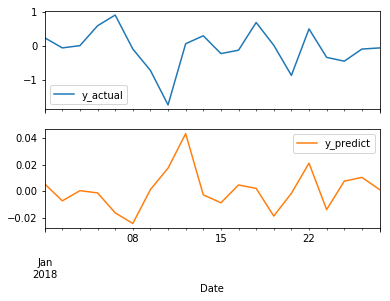

In [22]:
# plotting the predicted and the actual outcome:
result_comparison.iloc[:20].plot(subplots = True)

### Out-of-Sample Performance

In [23]:
from sklearn.metrics import mean_squared_error

In [31]:
# Judging the model through out-of -smaple and in-sample performance metrics :
mse = mean_squared_error(result_comparison.y_actual,result_comparison.y_predict)
mse

0.415484105880405

In [25]:
rmse = np.sqrt(mse)
rmse

0.6445805658569028

### In-sample-Performance:

In [26]:
in_sample = pd.DataFrame(y_train)
in_sample.head()

,Returns
Date,
1990-01-04,-1.468476
1990-01-05,0.874777
1990-01-08,-0.216798
1990-01-09,0.667901
1990-01-10,0.567546


In [27]:
in_sample['sample_pred'] = model.predict(X_train)

In [28]:
in_sample.head()

,Returns,sample_pred
Date,,
1990-01-04,-1.468476,0.020446
1990-01-05,0.874777,0.036249
1990-01-08,-0.216798,-0.023309
1990-01-09,0.667901,0.004436
1990-01-10,0.567546,-0.018051


In [29]:
mse_sample = mean_squared_error(in_sample.Returns, in_sample.sample_pred)
mse

0.415484105880405

In [30]:
rmse_sample =np.sqrt(mse_sample)
rmse_sample

0.841994632894117